In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "./dataset/Tweets.csv"  
df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Overview:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

# Check sentiment distribution
print("\nSentiment Distribution:")
print(df['airline_sentiment'].value_counts())


2024-12-12 18:13:23.207285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dataset Overview:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1             

/var/folders/b9/3qfldbf13rg11y_6lvr1wzbr0000gn/T/ipykernel_49538/3958461427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='coolwarm')


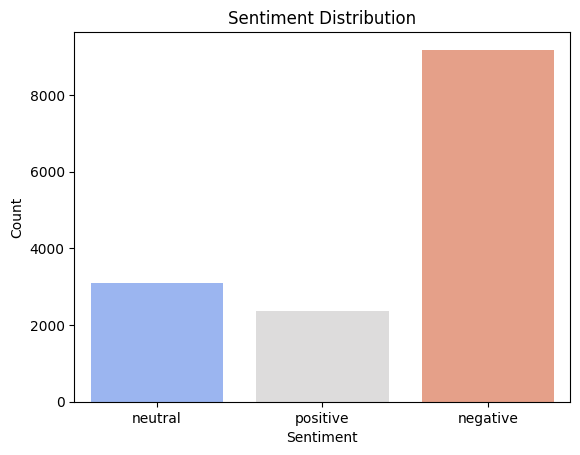

In [4]:
# Sentiment distribution plot
sns.countplot(data=df, x='airline_sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


/var/folders/b9/3qfldbf13rg11y_6lvr1wzbr0000gn/T/ipykernel_49538/1272384800.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(neg_word_dict.values()), y=list(neg_word_dict.keys()), palette='Reds_r')
/var/folders/b9/3qfldbf13rg11y_6lvr1wzbr0000gn/T/ipykernel_49538/1272384800.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_word_dict.values()), y=list(pos_word_dict.keys()), palette='Greens_r')


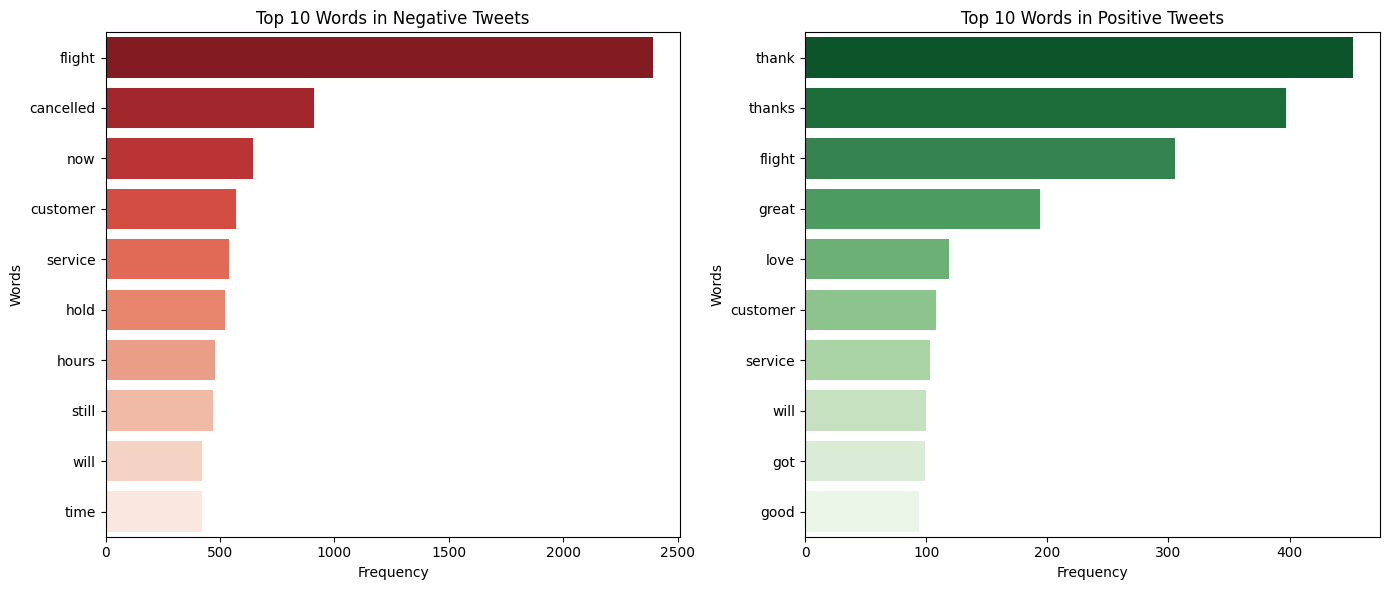

In [12]:

from wordcloud import STOPWORDS

# Function to preprocess text and extract frequent words
def get_frequent_words(df, sentiment, top_n=7):
    # Combine all text for the current sentiment
    text = " ".join(df[df['airline_sentiment'] == sentiment]['text'])

    # Remove stopwords
    stopwords = set(STOPWORDS)
    words = [word for word in text.lower().split() if word.isalpha() and word not in stopwords]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words
    return word_counts.most_common(top_n)

# Get frequent words for each sentiment
negative_words = get_frequent_words(df, 'negative', top_n=10)
positive_words = get_frequent_words(df, 'positive', top_n=10)

# Convert to dictionaries for visualization
neg_word_dict = dict(negative_words)
pos_word_dict = dict(positive_words)

# Plotting
plt.figure(figsize=(14, 6))

# Bar plot for Negative Sentiment
plt.subplot(1, 2, 1)
sns.barplot(x=list(neg_word_dict.values()), y=list(neg_word_dict.keys()), palette='Reds_r')
plt.title("Top 10 Words in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")

# Bar plot for Positive Sentiment
plt.subplot(1, 2, 2)
sns.barplot(x=list(pos_word_dict.values()), y=list(pos_word_dict.keys()), palette='Greens_r')
plt.title("Top 10 Words in Positive Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")

plt.tight_layout()
plt.show()


In [14]:
from collections import Counter
from nltk.corpus import stopwords
import nltk


# Define stop words
stop_words = set(STOPWORDS)

# Extract top words for negative sentiment
negative_text = " ".join(df[df['airline_sentiment'] == 'negative']['text'])
words = [word for word in negative_text.split() if word.lower() not in stop_words]
most_common_words = Counter(words).most_common(7)

# Display top words
print("Top 7 words in negative tweets:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 7 words in negative tweets:
@united: 2510
@USAirways: 2207
@AmericanAir: 2035
flight: 1915
@SouthwestAir: 1157
Cancelled: 912
@JetBlue: 893


In [15]:
# Preprocessing
df['text'] = df['text'].fillna("").str.lower()

# Feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

# Encode sentiment labels
y = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1889
           1       0.64      0.48      0.55       580
           2       0.78      0.66      0.71       459

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



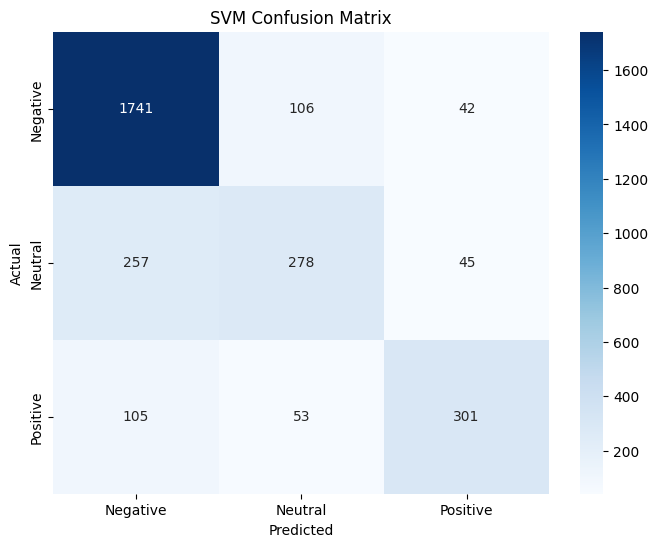

In [17]:
# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test)

# Classification report and accuracy
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
from keras.utils import to_categorical

# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train MLNN
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate MLNN
mlnn_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("MLNN Accuracy:", mlnn_accuracy)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6443 - loss: 0.8457 - val_accuracy: 0.7704 - val_loss: 0.5633
Epoch 2/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8443 - loss: 0.4062 - val_accuracy: 0.7700 - val_loss: 0.5691
Epoch 3/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9052 - loss: 0.2729 - val_accuracy: 0.7648 - val_loss: 0.6518
Epoch 4/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9393 - loss: 0.1855 - val_accuracy: 0.7563 - val_loss: 0.7407
Epoch 5/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9626 - loss: 0.1249 - val_accuracy: 0.7516 - val_loss: 0.8536
Epoch 6/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9753 - loss: 0.0857 - val_accuracy: 0.7512 - val_loss: 0.9665
Epoch 7/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9803 - loss: 0.0650 - val_accuracy: 0.7469 - val_loss: 1.0867
Epoch 8/15
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9875 - loss: 0.0443 - val_acc

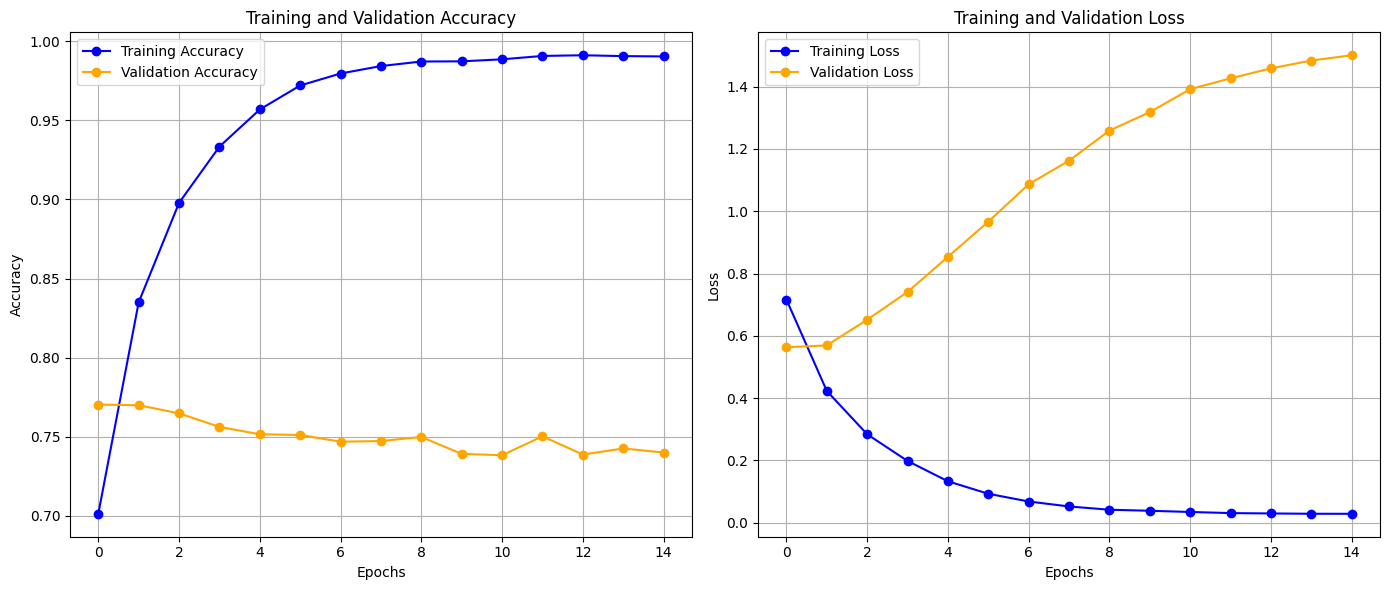

In [19]:
# Plot training and validation metrics
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


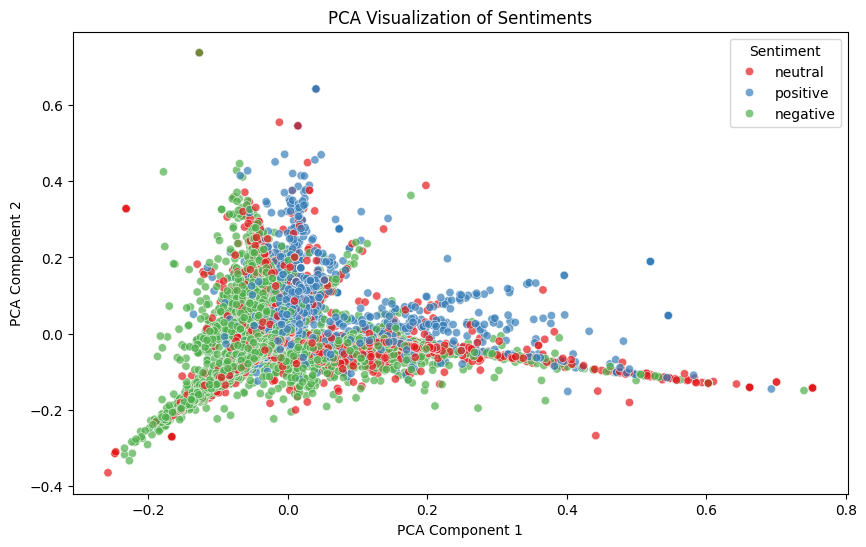

In [27]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['airline_sentiment'], palette='Set1', alpha=0.7)
plt.title("PCA Visualization of Sentiments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Sentiment")
plt.show()


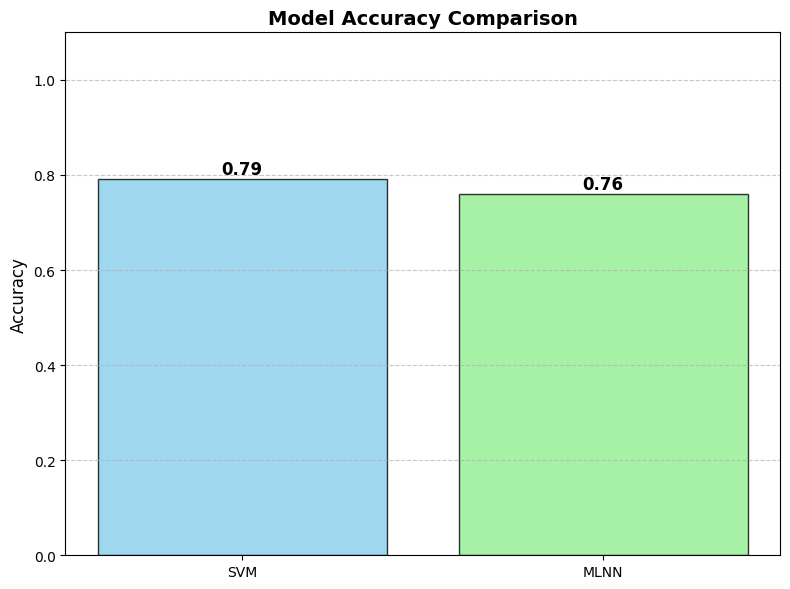

In [31]:
# Model accuracies
model_names = ['SVM', 'MLNN']
accuracies = [svm_accuracy, mlnn_accuracy]

# Plot bar chart
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'lightgreen']
plt.bar(model_names, accuracies, color=colors, edgecolor='black', alpha=0.8)

# Annotate the accuracy values on top of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', fontsize=12, fontweight='bold')

# Add titles and labels
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.1)  # Ensures space for annotations above bars
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()